# Classify whether the image show acid or base

In [2]:
import numpy as np
import pandas as pd
from load_data import LoadData
from sklearn.utils import shuffle
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
from importlib import reload
%matplotlib inline

In [3]:
df = LoadData(37).load_data()
df = shuffle(df)
df.head()

no image
no image
no image
no image
no image
no image


,blue,green,red,label
406,0,231,192,4
262,104,181,16,8
161,196,58,40,12
362,1,203,126,5
194,23,39,135,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 406 to 286
Data columns (total 4 columns):
blue     549 non-null int32
green    549 non-null int32
red      549 non-null int32
label    549 non-null int32
dtypes: int32(4)
memory usage: 12.9 KB


### Split data into two bins <0,7) - acid, <7,14> - base

In [5]:
def label(row):
    if row['label'] < 7:
        return 0 # acid
    else: 
        return 1 # base
df['class'] = df.apply(lambda row: label(row), axis=1)
df.drop('label', axis=1, inplace=True)
df.head()

,blue,green,red,class
406,0,231,192,0
262,104,181,16,1
161,196,58,40,1
362,1,203,126,0
194,23,39,135,0


In [6]:
df['class'].value_counts()

1    295
0    254
Name: class, dtype: int64

### Probability

In [7]:
n = df['class'].value_counts()[0] + df['class'].value_counts()[1]
n0 = df['class'].value_counts()[0]
n1 = df['class'].value_counts()[1]

p_0 = n0 / n 
p_1 = n1 / n

print("Probliblity a priori for class\t 0 : {}\t 1: {}".format(round(p_0, 3), round(p_1, 3)))

Probliblity a priori for class	 0 : 0.463	 1: 0.537


### Calculate mean of each class 

In [8]:
# acid 
m_blue_acid = df[df['class'] == 0]['blue'].mean()
m_green_acid = df[df['class'] == 0]['green'].mean()
m_red_acid = df[df['class'] == 0]['red'].mean()
# base 
m_blue_base = df[df['class'] == 1]['blue'].mean()
m_green_base = df[df['class'] == 1]['green'].mean()
m_red_base = df[df['class'] == 1]['red'].mean()

# mean acid vector
m_acid = np.array([m_red_acid, m_green_acid, m_blue_acid]).T
m_acid_matrix = np.matrix(m_acid)
# mean base vector
m_base = np.array([m_red_base, m_green_base, m_blue_base]).T
m_base_matrix = np.matrix(m_base)

# only for plotly
m_acid_df = pd.DataFrame(data=m_acid).T
m_acid_df.columns = ['red', 'green', 'blue']
m_base_df = pd.DataFrame(data=m_base).T
m_base_df.columns = ['red', 'green', 'blue']


print("Mean for acid:\n red - {}\n green - {}\n blue - {}".
      format(round(m_red_acid,3), round(m_green_acid,3), round(m_blue_acid,3)))
print("Mean for base:\n red - {}\n green - {}\n blue - {}".
      format(round(m_red_base,3), round(m_green_base,3), round(m_blue_base,3)))

Mean for acid:
 red - 198.496
 green - 150.941
 blue - 25.886
Mean for base:
 red - 50.4
 green - 111.79
 blue - 142.129


### Calculating covariance

**calculating by hand**

In [9]:
acid_i = np.matrix(df[df['class'] == 0].drop('class', axis=1).values)
base_i = np.matrix(df[df['class'] == 1].drop('class', axis=1).values)
acid_cov_matrix = np.zeros((3, 3))
base_cov_matrix = np.zeros((3, 3))
for i in range(n0):
    acid_cov_matrix += np.dot((acid_i[i].T - m_acid_matrix.T),(acid_i[i] - m_acid_matrix))
for i in range(n1):
    base_cov_matrix += np.dot((base_i[i].T - m_base_matrix.T),(base_i[i] - m_base_matrix))
acid_cov_matrix = acid_cov_matrix / (n0 - 1)
base_cov_matrix = base_cov_matrix / (n1 - 1)
print('Acid covariance matrix: \n{} \nBase covariance matrix: \n{}'.format(acid_cov_matrix, base_cov_matrix))

Acid covariance matrix: 
[[ 30521.70069403   -212.09372569 -30427.75573434]
 [  -212.09372569   5972.15855404   -909.69786188]
 [-30427.75573434   -909.69786188  33659.70783667]] 
Base covariance matrix: 
[[12047.4244898  -1086.19392367 -8590.21052692]
 [-1086.19392367  4036.00329759  -645.33741497]
 [-8590.21052692  -645.33741497 10382.77039087]]


**with *Pandas* function**

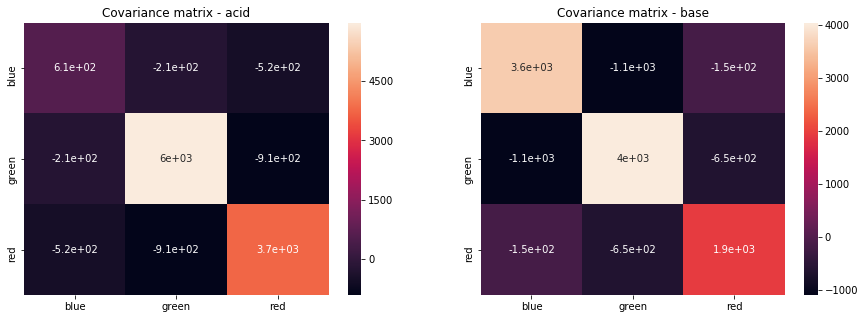

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# for acid
cov_acid = df[df['class'] == 0].drop('class', axis=1).cov()
# for base
cov_base = df[df['class'] == 1].drop('class', axis=1).cov()

fig, axn = plt.subplots(1, 2, figsize=(15,5))
sns.heatmap(cov_acid, 
            xticklabels=cov_acid.columns.values,
            yticklabels=cov_acid.columns.values,annot=True,ax=axn[0])
axn[0].set_title('Covariance matrix - acid')
sns.heatmap(cov_base, 
            xticklabels=cov_base.columns.values,
            yticklabels=cov_base.columns.values,annot=True,ax=axn[1])
axn[1].set_title('Covariance matrix - base')
plt.show()

### Visualization

In [12]:
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


acid = go.Scatter3d(
    x=df[df['class'] == 0]['blue'],
    y=df[df['class'] == 0]['red'],
    z=df[df['class'] == 0]['green'],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(255,0,0)',
                  line=dict(width=0)),
    name ='ACID'
)
base = go.Scatter3d(
    x=df[df['class'] == 1]['blue'],
    y=df[df['class'] == 1]['red'],
    z=df[df['class'] == 1]['green'],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(0,0,255)',
                  line=dict(width=0)),
    name ='BASE'
)

acid_mean = go.Scatter3d(
    x = m_acid_df['blue'],
    y = m_acid_df['green'],
    z = m_acid_df['red'],
    mode='markers',
    marker = dict(size=10,
                  color='rgb(255,20,0)',
                  line=dict(width=3)),
    name = "ACID_MEAN"
)

base_mean = go.Scatter3d(
    x = m_base_df['blue'],
    y = m_base_df['green'],
    z = m_base_df['red'],
    mode='markers',
    marker = dict(size=10,
                  color='rgb(0,20,255)',
                  line=dict(width=3)),
    name = "BASE_MEAN"
)

data = [acid, base, acid_mean, base_mean]
layout = go.Layout(
    title='PH-scale',
    scene = dict(
        xaxis = dict(title='blue'),
        yaxis = dict(title='red'),
        zaxis = dict(title='green'),)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='ph-scale')

### W matrix

*** 
W is an intragroup covariance matrix 
$$
    \begin{align}
    \large W = \frac{1}{n-2} \sum_{k=1}^{2} \left(n_k - 1\right) S_k
    \end{align}
$$
$S_k$ is a covariance matrix of each class, $n$ is a sum of every instances. 

**using calculated by hand matrixes**

In [13]:
W = ((n0 - 1) * acid_cov_matrix + (n1 - 1) * base_cov_matrix) / (n - 2)
W

array([[ 20592.19940693,   -681.90260724, -18690.57421518],
       [  -681.90260724,   4931.51934856,   -767.61016281],
       [-18690.57421518,   -767.61016281,  21148.88588225]])

**using *Pandas* matrixes**

In [14]:
W_pd = ((n0 - 1) * cov_acid + (n1 - 1) * cov_base) / (n - 2)
W_pd

,blue,green,red
blue,2219.379879,-681.902607,-317.754688
green,-681.902607,4931.519349,-767.610163
red,-317.754688,-767.610163,2776.066355


### $\hat{a}$ vector and $b$

\begin{align}
\large \hat{a} &= W^{-1} \left(mean_{2} - mean_{1}\right) \\
\large b &= - 0.5 \cdot \hat{a}^T \cdot \left(mean_{2} - mean_{1}\right)
\end{align}


**using calculated by hand matrixes**

In [15]:
hat_a = np.linalg.pinv(W)
hat_a = hat_a.dot(m_acid_matrix.T - m_base_matrix.T)
print(hat_a)

[[0.0148925 ]
 [0.01125488]
 [0.00807351]]


In [16]:
b = - 0.5 * hat_a.T
b = b.dot(m_acid_matrix.T - m_base_matrix.T)
print(b)

[[-0.85383645]]


In [17]:
hat_a_pd = pd.DataFrame(np.linalg.pinv(W_pd.values), W_pd.columns, W_pd.index).as_matrix()
hat_a_pd = hat_a_pd.dot(m_acid_matrix.T - m_base_matrix.T)
print(hat_a_pd)

[[ 0.06606903]
 [ 0.01226173]
 [-0.03092038]]


In [18]:
b_pd = - 0.5 * hat_a_pd.T
b_pd = b_pd.dot(m_acid_matrix.T - m_base_matrix.T)
print(b_pd)

[[-6.9294502]]


### Calculate hypersurface parametrs

In [19]:
hyper_d = (0.5 * ((m_base_matrix - m_acid_matrix) * np.linalg.inv(W)) * (m_acid_matrix.T + m_base_matrix.T)).item(0)
hyper_a = ((m_base_matrix - m_acid_matrix) * np.linalg.inv(W)).item(0)
hyper_b = ((m_base_matrix - m_acid_matrix) * np.linalg.inv(W)).item(1)
hyper_c = ((m_base_matrix - m_acid_matrix) * np.linalg.inv(W)).item(2)
print("a : {}\tb : {}\tc : {}\td : {}".format(hyper_a, hyper_b, hyper_c, hyper_d))

a : -0.014892502779551751	b : -0.01125488058618462	c : -0.00807351287122431	d : -4.010078587265111


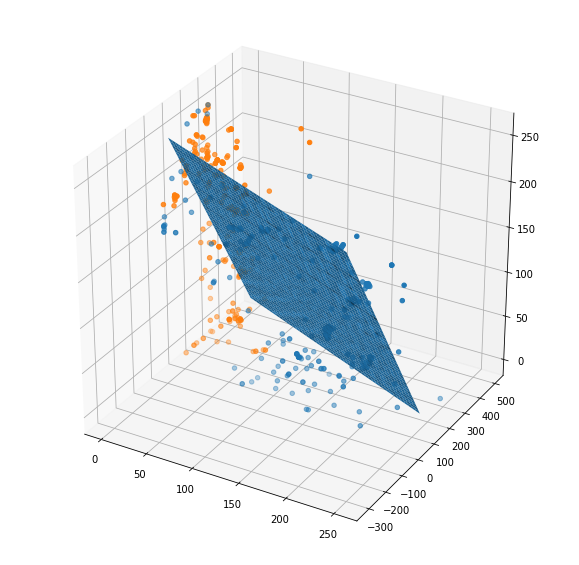

In [82]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import os

def rotate(angle):
    ax.view_init(azim=angle)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

x = np.linspace(0,250)
y = np.linspace(0,250)

X,Y = np.meshgrid(x,y)
Z = (-hyper_a*X - hyper_b*Y + hyper_d) * (1. / hyper_c)

# plot the surface
ax.plot_surface(Y, Z, X) # use in animation
ax.scatter(df[df['class'] == 1]['blue'],
    df[df['class'] == 1]['red'],
    df[df['class'] == 1]['green'])
ax.scatter(df[df['class'] == 0]['blue'],
    df[df['class'] == 0]['red'],
    df[df['class'] == 0]['green'])
# plt.axis('off')
# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)
# rot_animation.save('rotation1.gif', dpi=80, writer='imagemagick')
plt.show()

*the surface is supposed to split the data. I have to find a mistake*

In [ ]:
# naive Bayes 
# LDA or QDA 
# random forest + graphs 

## Split data 

In [74]:
X = df.drop('class', axis=1)
y = df['class']
X.shape, y.shape

((549, 3), (549,))

## Linear discriminant analysis

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=True, tol=0.0001)

In [76]:
lda_matrix = lda.covariance_
print(lda_matrix)

[[2211.29470685 -679.41844473 -316.59711143]
 [-679.41844473 4913.55388646 -764.81376877]
 [-316.59711143 -764.81376877 2765.95318044]]


**try to use this matrix to create surface**

In [77]:
lda_d = (0.5 * ((m_base_matrix - m_acid_matrix) * np.linalg.inv(lda_matrix)) *(m_acid_matrix.T + m_base_matrix.T)).item(0)
lda_a = ((m_base_matrix - m_acid_matrix) * np.linalg.inv(lda_matrix)).item(0)
lda_b = ((m_base_matrix - m_acid_matrix) * np.linalg.inv(lda_matrix)).item(1)
lda_c = ((m_base_matrix - m_acid_matrix) * np.linalg.inv(lda_matrix)).item(2)
print("a : {}\tb : {}\tc : {}\td : {}".format(lda_a, lda_b, lda_c, lda_d))

a : -0.0663105983442148	b : -0.012306563648768786	c : 0.03103342969686512	d : -7.261844671801868


In [84]:
acid = go.Scatter3d(
    x=df[df['class'] == 0]['blue'],
    y=df[df['class'] == 0]['red'],
    z=df[df['class'] == 0]['green'],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(255,0,0)',
                  line=dict(width=0)),
    name ='ACID'
)
base = go.Scatter3d(
    x=df[df['class'] == 1]['blue'],
    y=df[df['class'] == 1]['red'],
    z=df[df['class'] == 1]['green'],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(0,0,255)',
                  line=dict(width=0)),
    name ='BASE'
)

x = np.linspace(0,250)
y = np.linspace(0,250)
X,Y = np.meshgrid(x,y)
Z = (-hyper_a*X - hyper_b*Y + hyper_d) * (1. / hyper_c)
Z_lda = (-lda_a*X - lda_b*Y + lda_d) * (1. / lda_c)

surface = go.Surface(z=Y, x=Z, y=X, colorscale='RdBu', opacity=0.999, name ='SURFACE')
surface_lda = go.Surface(z=Y, x=Z_lda, y=X, colorscale='RdBu', opacity=0.999, name ='SURFACE_lda')

data_surface = [acid, base, surface, surface_lda]
layout = go.Layout(
    title='Comparation between surfaces',
    scene = dict(
        xaxis = dict(title='blue'),
        yaxis = dict(title='red'),
        zaxis = dict(title='green'),)
)
fig = go.Figure(data=data_surface, layout=layout)
py.iplot(fig,filename='ph-surface')

In [92]:
lda.predict_proba([[255,0,0]]) # only blue -> base 

array([[2.94392351e-07, 9.99999706e-01]])